# Welter issue #1
## Telluric Absorption Lines and Spectral Shape
### Part 2- How bad is bare telluric division, with its native wavelength scale?

Michael Gully-Santiago  
Friday, November 27, 2015  


In the [previous notebook](welter_issue001-Spectral_Response_Functions_01.ipynb), we jumped to the assumption that we will need to wavelength-shift the telluric spectrum before dividing out the telluric spectrum.  

In this notebook, we question that assumption by seeing how bad the fit is if we just blindly divide out the telluric spectrum with its native wavelength scale.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

In [3]:
hdu_raw = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec.fits')
hdu_f   = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec_flattened.fits')
hdu_var = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.variance.fits')
hdu_tar = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0205.spec.fits')
hdr = hdu_tar[0].header

## The problem: What does the divided spectrum look like?

Let's just try: 

$$\frac{f_{raw}}{\hat t_{inst} \cdot \hat t_{\oplus}} \stackrel{?}{=} f_{\star}$$  

and see what we get.

In [4]:
from scipy import signal

In [5]:
o=10

In [6]:
t_inst = hdu_raw[0].data[o, :] / hdu_f[0].data[o, :] 
t_oplus = hdu_f[0].data[o, :] 

In [7]:
dx0, dx1 = 1500, 1900 #Pick the middle 1000 pixels
sub_sample_y = hdu_f[0].data[o, dx0:dx1]
sub_sample_x = hdu_raw[1].data[o, dx0:dx1]

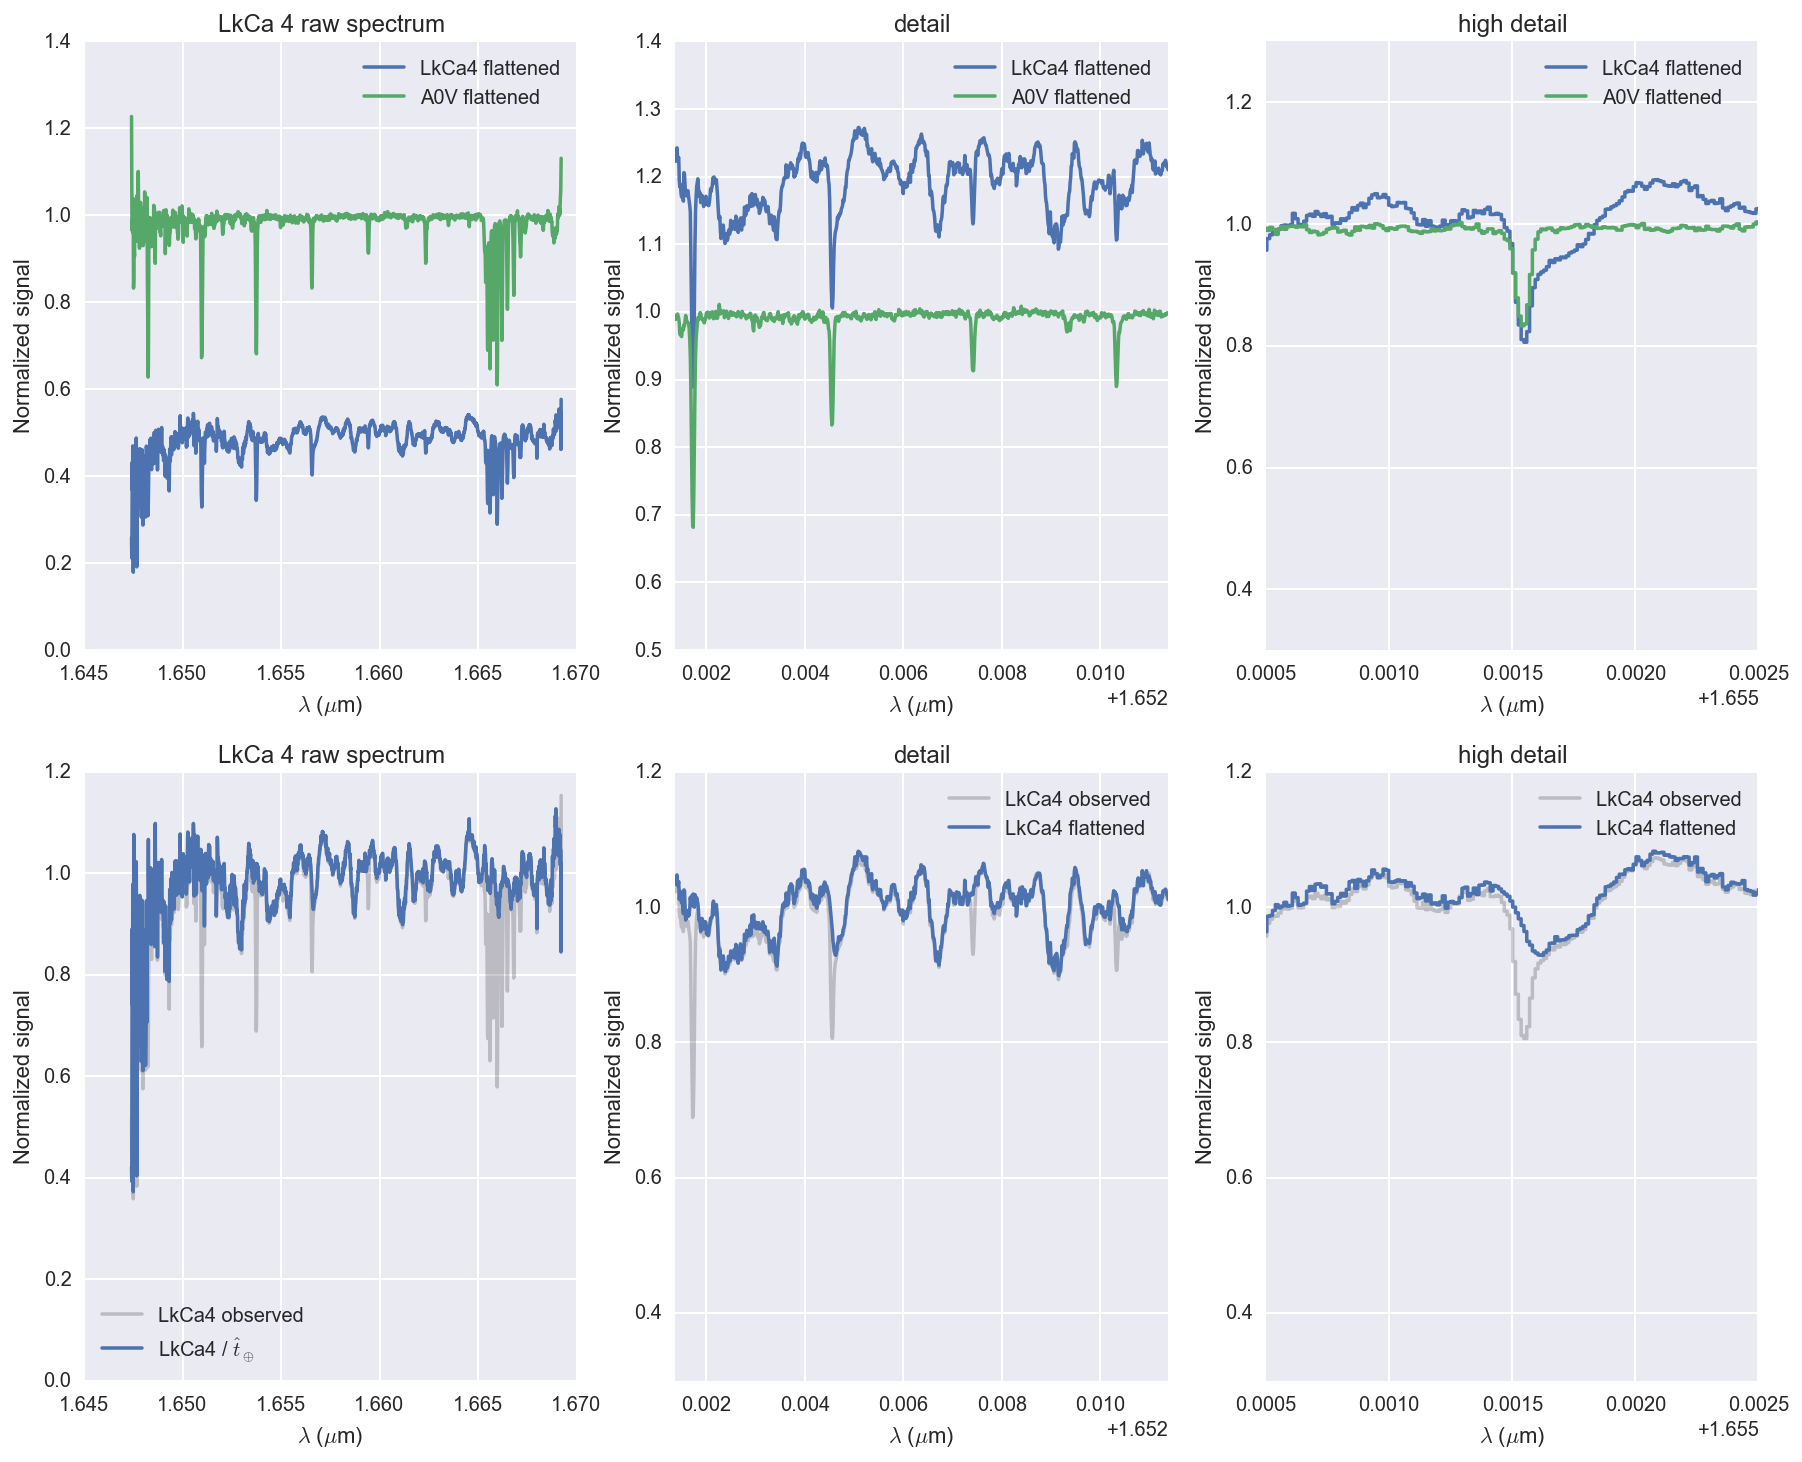

In [8]:
x_det = 1.6565
plt.figure(figsize=(15, 12))

plt.subplot(231)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.plot(hdu_tar[1].data[o, :], tar_f, label='LkCa4 flattened')
plt.plot(hdu_raw[1].data[o, :], hdu_f[0].data[o, :], label='A0V flattened')
#plt.plot(sub_sample_x, sub_sample_y, label='sub sample')
plt.legend(loc='best')
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('{OBJECT} raw spectrum'.format(OBJECT=hdr['OBJECT']));

plt.subplot(232)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.plot(hdu_tar[1].data[o, :], tar_f/0.5+0.2, label='LkCa4 flattened')
plt.plot(hdu_raw[1].data[o, :], hdu_f[0].data[o, :], label='A0V flattened')
plt.legend(loc='best')
x_c = hdu_raw[1].data[o, 1024]
plt.xlim(x_c-0.005, x_c+0.005)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('detail');

plt.subplot(233)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.step(hdu_tar[1].data[o, :], tar_f/0.5, label='LkCa4 flattened')
plt.step(hdu_raw[1].data[o, :], hdu_f[0].data[o, :], label='A0V flattened')
plt.legend(loc='best')
x_c = x_det
plt.xlim(x_c-0.001, x_c+0.001)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('high detail');

plt.subplot(234)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.plot(hdu_tar[1].data[o, :], tar_f/0.5, 'k', alpha=0.2, label='LkCa4 observed')
plt.plot(hdu_tar[1].data[o, :], tar_f/0.5/hdu_f[0].data[o, :], label='LkCa4 / $\hat t_{\oplus}$')
plt.legend(loc='best')
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('{OBJECT} raw spectrum'.format(OBJECT=hdr['OBJECT']));

plt.subplot(235)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.plot(hdu_tar[1].data[o, :], tar_f/0.5, 'k', alpha=0.2, label='LkCa4 observed')
plt.plot(hdu_tar[1].data[o, :], tar_f/0.5/hdu_f[0].data[o, :], label='LkCa4 flattened')
plt.legend(loc='best')
x_c = hdu_raw[1].data[o, 1024]
plt.xlim(x_c-0.005, x_c+0.005)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('detail');

plt.subplot(236)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.step(hdu_tar[1].data[o, :], tar_f/0.5, 'k', alpha=0.2, label='LkCa4 observed')
plt.step(hdu_tar[1].data[o, :], tar_f/0.5/hdu_f[0].data[o, :], label='LkCa4 flattened')
plt.legend(loc='best')
x_c = x_det
plt.xlim(x_c-0.001, x_c+0.001)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('high detail');

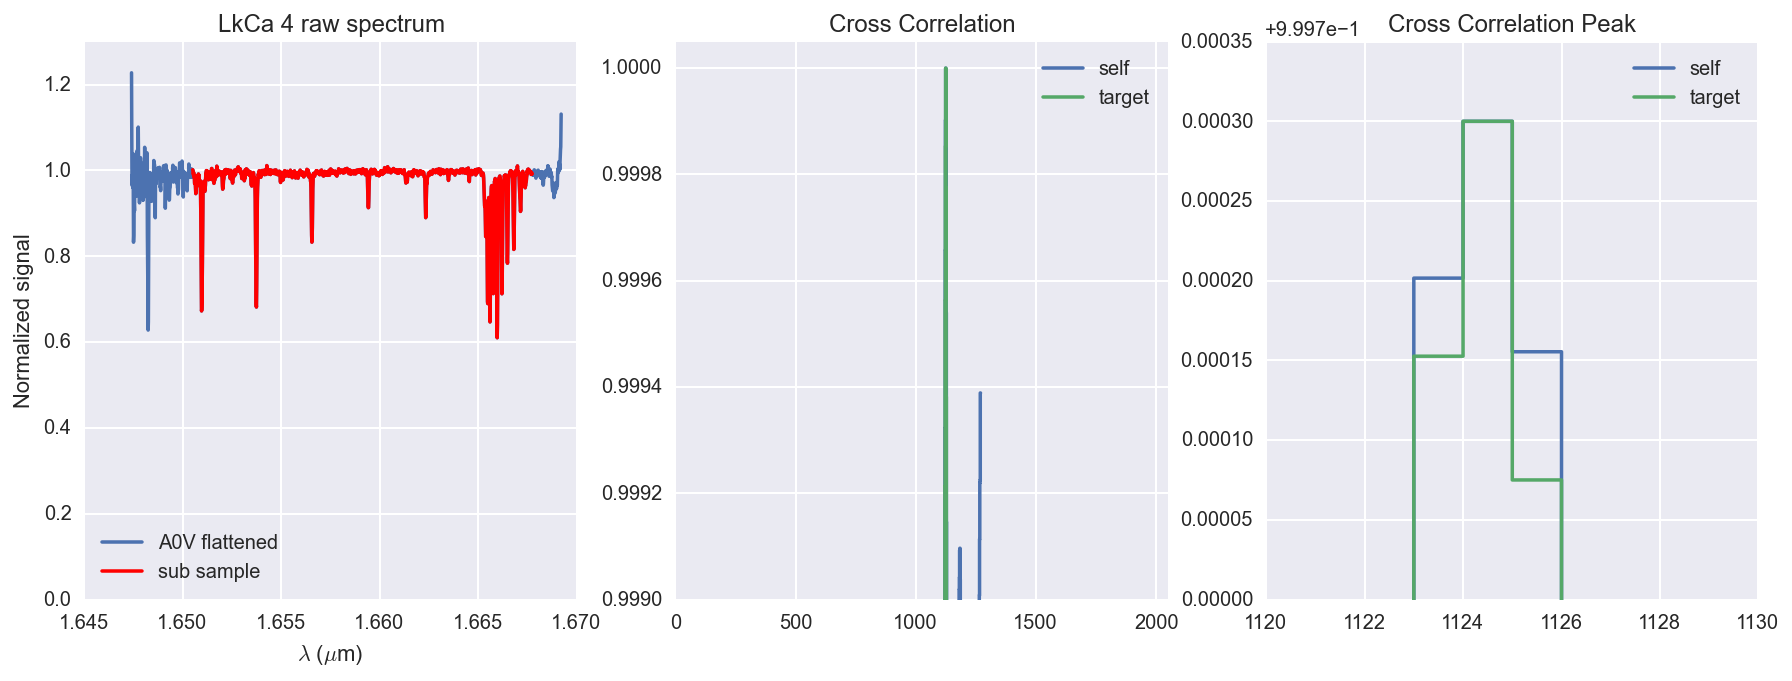

In [9]:
dx0, dx1 = 350, 1900 #Pick the middle 1000 pixels

cor1 = signal.correlate(tar_f/0.5, hdu_f[0].data[o, dx0:dx1], mode='same')
cor2 = signal.correlate(tar_f/0.5, tar_f[dx0:dx1]/0.5, mode='same')
x = np.arange(2048)


plt.figure(figsize=(15,5))

plt.subplot(131)
tar_f = hdu_tar[0].data[o, :] / t_inst
plt.plot(hdu_raw[1].data[o, :], hdu_f[0].data[o, :], label='A0V flattened')
plt.plot(hdu_raw[1].data[o, dx0:dx1], hdu_f[0].data[o, dx0:dx1], 'r', label='sub sample')
plt.legend(loc='best')
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('{OBJECT} raw spectrum'.format(OBJECT=hdr['OBJECT']));


plt.subplot(132)
plt.step(x, cor1/np.nanmax(cor1), label='self')
plt.step(x, cor2/np.nanmax(cor2), label='target')
plt.ylim(0.999, 1.00005)
#plt.xlim(1160, 1180)
plt.xlim(x[0], x[-1])
plt.title('Cross Correlation')
plt.legend(loc='best');

x_max = np.nanargmax(cor1)

plt.subplot(133)
plt.step(x, cor1/np.nanmax(cor1), label='self')
plt.step(x, cor2/np.nanmax(cor2), label='target')
plt.ylim(0.99970, 1.00005)
window = 10
plt.xlim(x_max-window/2.0, x_max+window/2.0)
plt.title('Cross Correlation Peak')
plt.legend(loc='best');



### The bare telluric is "good enough" even with out wavelength shifting!
...in this case at least.  But that's great news because it means we can just blindly divided the spectra and move on.  We don't have to fuss around with determining wavelength shifts and sub-pixel shifting and resampling.

## The end, closes issue #1.